## Find the knee

In [1]:
from kneed import KneeLocator 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn import metrics

In [2]:
df = pd.read_csv(r"\Users\cxb0254\Desktop\Smart Steps\Anomalies detection\df.csv", sep = ",")

In [3]:
gdf = pd.read_csv(r"\Users\cxb0254\Desktop\Smart Steps\Anomalies detection\gdf.csv")

In [4]:
gdf.head()

,Unnamed: 0,zone,Date,total,wkt,centroid,centroid_lon,centroid_lat
0,0,LU7 9,17,21,"MULTIPOLYGON (((-0.660083 51.844451, -0.657159...",POINT (-0.6156741486717967 51.89783347488114),-0.615674,51.897833
1,1,LE12 8,17,1,"MULTIPOLYGON (((-1.137943 52.773916, -1.133007...",POINT (-1.179287793821555 52.73879091529155),-1.179288,52.738791
2,2,LU7 2,17,21,"MULTIPOLYGON (((-0.699612 51.919991, -0.698652...",POINT (-0.6840081928650118 51.91830530388929),-0.684008,51.918305
3,3,MK13 7,17,1,"MULTIPOLYGON (((-0.787788 52.063487, -0.786346...",POINT (-0.7795627581003672 52.05696593651801),-0.779563,52.056966
4,4,HP17 0,17,18,"MULTIPOLYGON (((-0.7896069999999999 51.733182,...",POINT (-0.787106483622548 51.74828403937672),-0.787106,51.748284


In [5]:
df.head()

,Unnamed: 0,zone1,zone2,distance,aggregated,points
0,648,HP19 7,HP19 8,0.835640,0.002048,1
1,3717,HP21 7,HP20 1,1.009061,0.002473,2
2,1503,HP19 9,HP19 8,1.107396,0.002714,3
3,3332,HP19 0,HP20 2,1.132971,0.002777,4
4,3891,HP20 2,HP20 1,1.133806,0.002779,5


In [6]:
x = df['points']
y = df['aggregated']

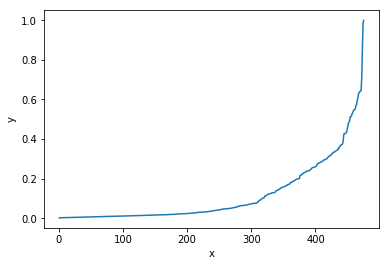

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)

In [8]:
kn = KneeLocator(
    x,
    y,
    curve='convex',
    direction='increasing',
    interp_method='polynomial')

print(kn.knee)

384


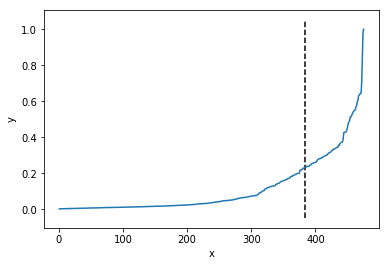

In [9]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [10]:
print(kn.knee)

384


### We define eps parameter with the point of the knee in the graph

In [11]:
eps = float(df['distance'][df['points'] == kn.knee].values)

In [12]:
eps

94.71648016542845

### DBSCAN with eps = knee

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
kms_per_radian = 6371.0088
#median = table_final['distance'].median()

# Represent points as (lat, lon)
coords = gdf[["centroid_lat", "centroid_lon"]]
coords = coords.values

# Define epsilon and min_samples
epsilon = eps/kms_per_radian    # We have set epsilon to the value we´ve calculated above by extracting the knee point.
min_samples = round(np.log(df['zone1'].nunique()))  # Using the ln of the number of points of the dataset as min_samples

# Algorithm
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# Get the number of clusters
num_clusters = len(set(cluster_labels))

# Print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(gdf), len(set(cluster_labels)), 100*(1-float(num_clusters) / len(gdf)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 98 points down to 2 clusters, for 98.0% compression in 0.01 seconds
Silhouette coefficient: 0.614


Text(0.5,1,'DBSCAN: eps=knee, min_pts=ln(n)')

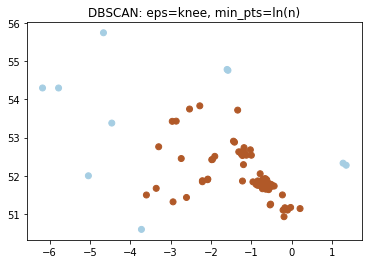

In [15]:
y_pred = db.fit_predict(np.radians(coords))
plt.scatter(coords[:,1], coords[:,0], c=y_pred, cmap='Paired')
plt.title("DBSCAN: eps=knee, min_pts=ln(n)")

In [16]:
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [17]:
set(cluster_labels)

{-1, 0}

### DBSCAN with eps = knee/2

In [18]:
kms_per_radian = 6371.0088
#median = table_final['distance'].median()

# Represent points as (lat, lon)
coords = gdf[["centroid_lat", "centroid_lon"]]
coords = coords.values

# Define epsilon and min_samples
epsilon = (eps/2)/kms_per_radian    # We have set epsilon to the value we´ve calculated above by extracting the knee point.
min_samples = round(np.log(df['zone1'].nunique()))  # Using the ln of the number of points of the dataset as min_samples

# Algorithm
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# Get the number of clusters
num_clusters = len(set(cluster_labels))

# Print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(gdf), len(set(cluster_labels)), 100*(1-float(num_clusters) / len(gdf)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 98 points down to 2 clusters, for 98.0% compression in 0.01 seconds
Silhouette coefficient: 0.571


Text(0.5,1,'DBSCAN: eps=knee/2, min_pts(ln(n))')

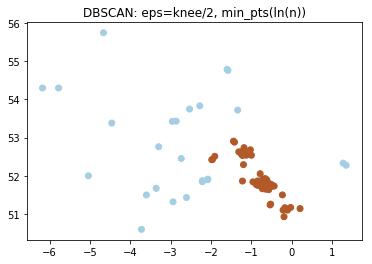

In [19]:
y_pred = db.fit_predict(np.radians(coords))
plt.scatter(coords[:,1], coords[:,0], c=y_pred, cmap='Paired')
plt.title("DBSCAN: eps=knee/2, min_pts(ln(n))")

In [20]:
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,
        0, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0], dtype=int64)

In [21]:
set(cluster_labels)

{-1, 0}

### DBSCAN with eps = knee/4

In [22]:
kms_per_radian = 6371.0088
#median = table_final['distance'].median()

# Represent points as (lat, lon)
coords = gdf[["centroid_lat", "centroid_lon"]]
coords = coords.values

# Define epsilon and min_samples
epsilon = (eps/4)/kms_per_radian    # We have set epsilon to the value we´ve calculated above by extracting the knee point.
min_samples = round(np.log(df['zone1'].nunique()))  # Using the ln of the number of points of the dataset as min_samples

# Algorithm
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# Get the number of clusters
num_clusters = len(set(cluster_labels))

# Print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(gdf), len(set(cluster_labels)), 100*(1-float(num_clusters) / len(gdf)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 98 points down to 4 clusters, for 95.9% compression in 0.01 seconds
Silhouette coefficient: 0.413


Text(0.5,1,'DBSCAN: eps=knee/4, min_pts=ln(n)')

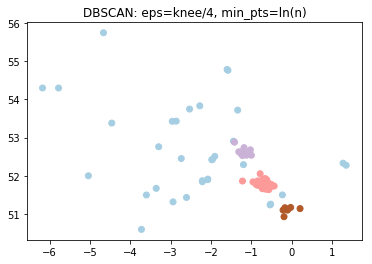

In [23]:
y_pred = db.fit_predict(np.radians(coords))
plt.scatter(coords[:,1], coords[:,0], c=y_pred, cmap='Paired')
plt.title("DBSCAN: eps=knee/4, min_pts=ln(n)")

In [24]:
cluster_labels

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0, -1,  0,  1, -1,  0,
        0,  0,  0,  1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0,  0,  0,
        1, -1,  0,  0,  0, -1,  2, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        0, -1, -1, -1,  0,  0,  0,  0,  0,  2, -1,  0,  1, -1, -1, -1,  0,
        1, -1,  0, -1,  2,  0, -1,  1,  0,  2, -1,  0, -1, -1,  2, -1,  2,
        2, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0], dtype=int64)

In [25]:
set(cluster_labels)

{-1, 0, 1, 2}

In [26]:
for i in set(cluster_labels):
    print(cluster_labels.tolist().count(i))

48
10
7
33


### DBSCAN with eps = knee/8

In [27]:
kms_per_radian = 6371.0088
#median = table_final['distance'].median()

# Represent points as (lat, lon)
coords = gdf[["centroid_lat", "centroid_lon"]]
coords = coords.values

# Define epsilon and min_samples
epsilon = (eps/8)/kms_per_radian    # We have set epsilon to the value we´ve calculated above by extracting the knee point.
min_samples = round(np.log(df['zone1'].nunique()))  # Using the ln of the number of points of the dataset as min_samples

# Algorithm
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# Get the number of clusters
num_clusters = len(set(cluster_labels))

# Print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(gdf), len(set(cluster_labels)), 100*(1-float(num_clusters) / len(gdf)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 98 points down to 4 clusters, for 95.9% compression in 0.01 seconds
Silhouette coefficient: 0.308


Text(0.5,1,'DBSCAN: eps=knee/8, min_pts=ln(n)')

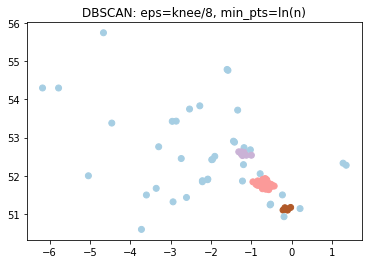

In [28]:
y_pred = db.fit_predict(np.radians(coords))
plt.scatter(coords[:,1], coords[:,0], c=y_pred, cmap='Paired')
plt.title("DBSCAN: eps=knee/8, min_pts=ln(n)")